In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cricket=pd.read_csv(r'Cricket.csv', sep=",", encoding="ISO-8859-1", header=0)
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
cricket=cricket[['Player', 'Ave', 'SR']]
cricket.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


{'whiskers': [<matplotlib.lines.Line2D at 0x1d19b3f3510>,
 'caps': [<matplotlib.lines.Line2D at 0x1d19b404fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d19b37d610>],
 'medians': [<matplotlib.lines.Line2D at 0x1d19b406890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d19b406dd0>],
 'means': []}

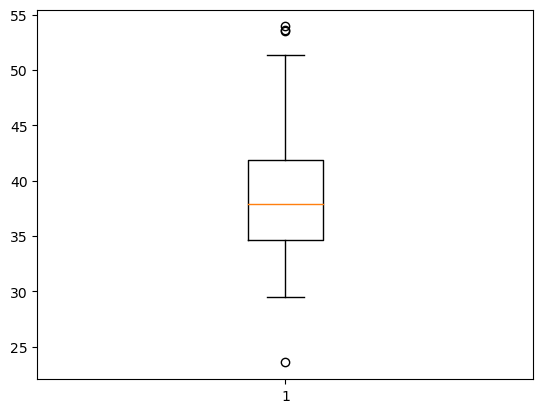

In [4]:
plt.boxplot(cricket['Ave'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d19bcc2590>,
 'caps': [<matplotlib.lines.Line2D at 0x1d19bcc3b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d19bcaea10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d19bcc91d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d19b439b90>],
 'means': []}

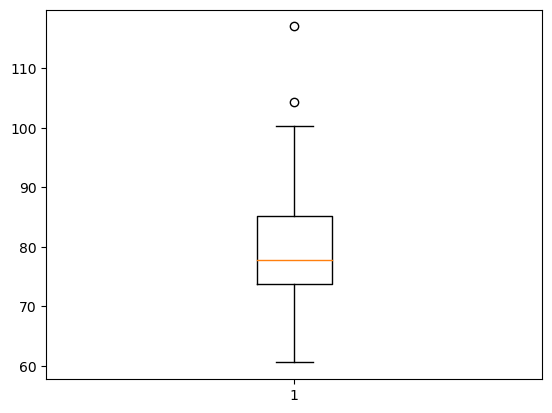

In [5]:
plt.boxplot(cricket['SR'])

In [6]:
AveSR_df = cricket[['Ave', 'SR']]
AveSR_df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [7]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [8]:
# instantiate the scaler
scaler = StandardScaler()

# fit transform
AveSR_df_scaled = scaler.fit_transform(AveSR_df)
AveSR_df_scaled.shape

(79, 2)

In [9]:
AveSR_df_scaled

array([[ 1.07229395,  0.70315153],
       [ 0.58772461, -0.0441395 ],
       [ 0.59622582,  0.1109969 ],
       [-1.04790945,  1.20709133],
       [-0.87618487, -0.03399986],
       [ 0.16946476, -0.51259058],
       [ 0.99238251, -0.64947564],
       [ 0.42450125, -0.56734461],
       [ 0.108256  , -0.8167796 ],
       [ 0.33268811,  0.02176813],
       [ 0.12695867,  0.70315153],
       [ 0.54181804, -0.42538973],
       [-0.44772356,  1.78910632],
       [ 2.17575185,  0.95258652],
       [-0.2725985 , -0.53489778],
       [ 2.5549061 ,  2.1247282 ],
       [-0.61604765,  0.1860302 ],
       [-0.20288853,  0.58958763],
       [ 0.11675721,  0.13938788],
       [ 0.52311536, -0.86747777],
       [-0.3355075 ,  0.84916225],
       [ 0.48400977, -1.64315977],
       [-0.16208269, -1.17369472],
       [ 0.14056062, -0.24287632],
       [-0.590544  ,  2.53842527],
       [ 2.62121559,  1.1857981 ],
       [-0.40691772,  0.4020044 ],
       [-2.5424233 ,  3.82311689],
       [-1.04110847,

# Modelling

In [10]:
avesr_df = pd.DataFrame(AveSR_df_scaled)
avesr_df.columns=['Ave', 'SR']
avesr_df.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [11]:
avesr_df.shape

(79, 2)

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans=KMeans(n_clusters=4, max_iter=50)
kmeans.fit(avesr_df)

C:\Users\Prem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [14]:
kmeans.labels_

array([1, 3, 3, 2, 0, 3, 3, 3, 3, 3, 2, 3, 2, 1, 0, 1, 0, 2, 3, 3, 2, 3,
       0, 3, 2, 1, 0, 2, 0, 3, 0, 0, 3, 0, 1, 0, 0, 3, 1, 3, 0, 0, 1, 0,
       0, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 3, 1, 1, 3,
       3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 2, 0])

In [15]:
# assign the label
cricket['cluster_id'] = kmeans.labels_
cricket.head()

,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,1
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,3
2,RT Ponting (AUS/ICC),42.03,80.39,3
3,ST Jayasuriya (Asia/SL),32.36,91.20,2
4,DPMD Jayawardene (Asia/SL),33.37,78.96,0


In [16]:
selected_row=cricket[cricket['Player']=='V Kohli (INDIA)']
print(selected_row)

             Player    Ave     SR  cluster_id
25  V Kohli (INDIA)  53.94  90.99           1


In [17]:
cricket.to_csv('Cricket_Cluster.csv', index=False)

In [18]:
centroids = kmeans.cluster_centers_

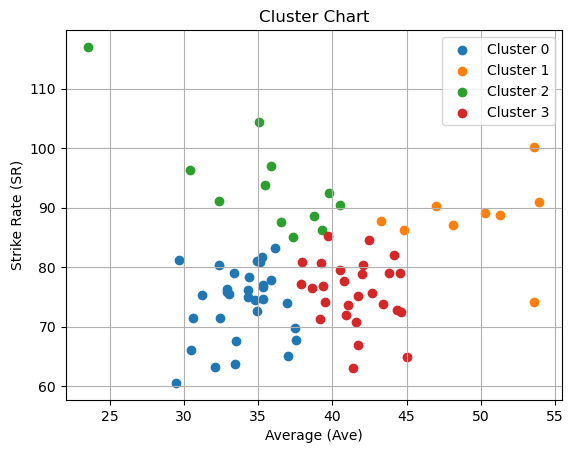

In [19]:
for cluster_id, group in cricket.groupby('cluster_id'):
    plt.scatter(group['Ave'], group['SR'], label=f'Cluster {cluster_id}')

plt.xlabel('Average (Ave)')
plt.ylabel('Strike Rate (SR)')
plt.title('Cluster Chart')
plt.legend()
plt.grid(True)
plt.show()

# Hierarchical Clustering

In [24]:
cric_hier=pd.read_csv(r'E:\Data Science\Upgrad\ML\K Means Clustering\Cricket_Hierarchy.csv', sep=",", encoding="ISO-8859-1", header=0)
cric_hier.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [26]:
cric_hier=cric_hier[['Player', 'Ave', 'SR']]
cric_hier.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


In [28]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [30]:
avesr_df.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


cricket.head()

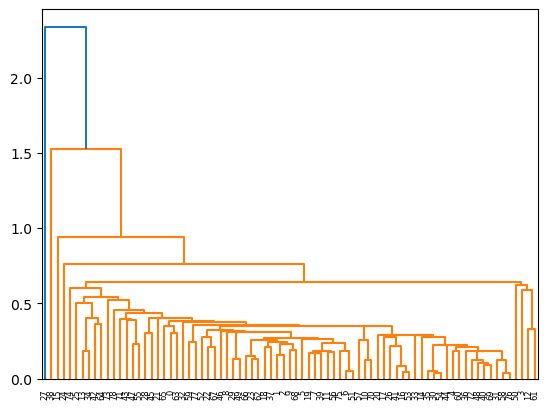

In [32]:
# single linkage
mergings=linkage(avesr_df, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
#complete linkage

## mergings=linkage(avesr_df, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()